(1) データの準備

今回は授業でも使用した「wine」というデータを使用した。
この「wine」というデータには「アルコール濃度」、「リンゴ酸」、「灰分」、「灰分のアルカリ度」、「マグネシウム」、「総フェノール類量」、「フラボノイド」、「非フラボノイドフェノール類」、「プロアントシアニジン」、「色の強さ」、「色合い」、「ワインの希釈度合い」、「プロリン」の計13個の要素が存在する。

(2)分析手法

今回の分析には、SVM(サポートベクターマシン)を使用した。このSVMとは、教師ありの機械学習アルゴリズムのことで、基本的に分類と回帰のどちらかに利用されます。高速で信頼性のあるアルゴリズムで、少ないデータでもよい性能を期待することができる。具体的に見てみると、例えば、特徴量が2つしかない2次元データのデータセットを考えた時、SVMでは、対象のデータセットをクラスの応じて最も適切に分割する直線を見つけるといったことを行います。

そして、今回この手法を使用したのは試行回数が少なくて済むため時間もかからない。また、線形にも非線形にも対応しているため分類がしやすい。

(178, 2)
(178,)


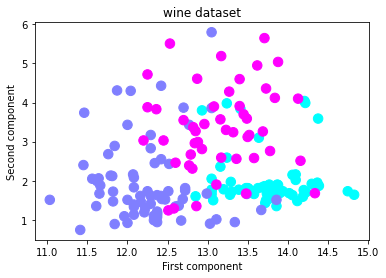

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets # wine data set is in 'datasets'
import matplotlib.cm as cm  # color map

wine = datasets.load_wine()
X = wine.data[:, 0:2] # is numpy array, first and second data
y = wine.target  # is numpy array
print(X.shape)
print(y.shape)

title = plt.title("wine dataset")
labx = plt.xlabel("First component")
laby = plt.ylabel("Second component")
plot = plt.scatter(X[:,0], X[:,1], c=y, s=90, cmap = cm.cool)
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
['class_0', 'class_1', 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
各次元の寄与率: [0.99809123 0.00173592]
累積寄与率: 0.9998271461156307


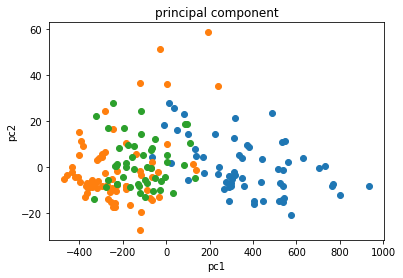

In [ ]:
# -*- coding: utf-8 -*-
# 参考サイト https://blog.amedama.jp/entry/2017/04/02/130530

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

wine = load_wine()

X1 = wine.data
matrix = X1.astype(np.float32).tolist()

Y1 = wine.target
labels = Y1.flatten().astype(np.int32).tolist()
names = wine.target_names.tolist()
features = wine.feature_names

print(labels)
print(names)
print(features)

# 主成分分析する
pca = PCA(n_components=2)
pca.fit(matrix)

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(matrix)

# 主成分をプロットする
for label in np.unique(labels):
    plt.scatter(transformed[labels == label, 0],
                transformed[labels == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の寄与率を出力する
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

# グラフを表示する
plt.show()

上の図は、先ほどの「wine」のデータに対して、主成分分析を行ったものである。主成分分析をすることにより、「wine」に含まれていた様々な要素を三つのデータに置き換えることができました。そして、その累積付与率もこのプログラムの中で計算されている。

SVC(kernel='linear')


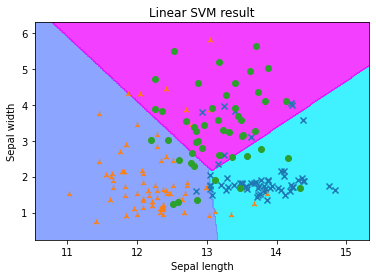

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets # wine data set is in 'datasets'
import matplotlib.cm as cm  # color map

wine = datasets.load_wine()
X = wine.data[:, 0:2] # is numpy array, first and second data
y = wine.target  # is numpy array

# SVC fitting is calculated with Linear function
svc_lin = svm.SVC(kernel='linear', C = 1.0); svc_lin.fit(X, y)
print(svc_lin)

# mesh grid is prepared
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5 # max & min with margin 0.5 
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# fitted function is applied to the grid
# np.c_[]: translates slice objects to concatenation along the second axis.

Z = svc_lin.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = cm.cool, alpha= 0.8)

#plt.show() #It just shows the devided areas of 3
# Devide X into 'x', '2', 'o'

iy0 = ( y==0 ); iy1 = ( y==1 ); iy2 = ( y==2 )
plt.scatter(X[iy0, 0], X[iy0, 1], marker='x')
plt.scatter(X[iy1, 0], X[iy1, 1], marker='2')
plt.scatter(X[iy2, 0], X[iy2, 1], marker='o')

# Title and X-axis, Y-axis
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Linear SVM result')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

上の図は、2次元データに対してSVM分析をしたものである。この結果を見てみると、全体を通して、●、△、×の多くは分類できているように見えるが、ところどこる分類できていないところが見受けられる。これは3つデータとも大まかにはうまくいっていると考える。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics #metrics
import random

wine = datasets.load_wine()
X = wine.data

"""
X = wine.data[:, 0:2] # is numpy array, first and second data
in 'step1.py, first and second data are used.
Here all 4-D data are used for SVM
A.Fujii Nov.,2,2017
"""
y = wine.target  # is numpy array

# SVC fitting is calculated with Linear function
svc_lin = svm.SVC(kernel='linear', C = 1.0); svc_lin.fit(X, y)
print(svc_lin)

dataid = [i for i in range(len(X))]
random.shuffle(dataid)


# 学習用とテスト用に分割する(2:1の比率) --- (※3)
total_len = len(X)
train_len = int(total_len * 2 / 3)

train_data = []
train_label = []
test_data = []
test_label = []

for i in range(total_len):
    data  = X[dataid[i]]
    label = y[dataid[i]]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

# データを学習し、予測する --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

# 正解率を求める --- (※5)
ac_score = metrics.accuracy_score(test_label, pre)
print("------------------ \n 正解率=", ac_score)

SVC(kernel='linear')
------------------ 
 正解率= 0.65


上の結果は、4次元の全データを使うものであり、データの2/3を学習にしようし、残りをSVM学習結果の判断に使用するというものである。今回の結果に関しは、正答率が0.85であったが、これは学習結果としてよいものだと考える。

SVC(kernel='linear')
SVC(gamma=1.0)
SVC(kernel='poly')


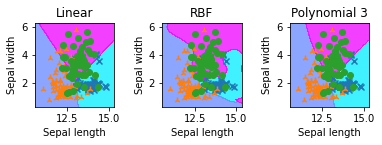

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets # wine data set is in 'datasets'
import matplotlib.cm as cm  # color map

wine = datasets.load_wine()
X = wine.data[:, 0:2] # is numpy array, first and second data
y = wine.target  # is numpy array

# SVC fitting is calculated with Linear function
svc_lin = svm.SVC(kernel='linear', C = 1.0); svc_lin.fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', gamma = 1.0,  C = 1.0); svc_rbf.fit(X, y)
svc_poly = svm.SVC(kernel='poly', degree = 3, C = 1.0); svc_poly.fit(X, y)

for i, clf in enumerate((svc_lin, svc_rbf, svc_poly)):
    print(clf)

# mesh grid is prepared
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5 # max & min with margin 0.5 
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# fitted function is applied to the grid
# np.c_[]: translates slice objects to concatenation along the second axis.


titles = ['Linear','RBF','Polynomial 3']
for i, clf in enumerate((svc_lin, svc_rbf, svc_poly)):
    plt.subplot(2, 3, i + 1 ) # plotting area
    plt.subplots_adjust(wspace = 0.6, hspace = 0.6 )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # clf is linear/rbf/poly
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = cm.cool, alpha= 0.8)

    iy0 = ( y==0 ); iy1 = ( y==1 ); iy2 = ( y==2 )
    plt.scatter(X[iy0, 0], X[iy0, 1], marker='x')
    plt.scatter(X[iy1, 0], X[iy1, 1], marker='2')
    plt.scatter(X[iy2, 0], X[iy2, 1], marker='o')

    # Title and X-axis, Y-axis
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.show()

上の結果は、左から順に、「線形SVM」、「RBFSVM」、「多項式SVM」という分析手法を使っている。「線形SVM」は名前の通り、線形な境界線を作っているが、「RBFSVM」、「多項式SVM」は非線形な境界線を作っている。非線形な境界線を作成することで、より正確な境界線を作成することが可能になる。